In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
nf = pd.read_csv("./file.csv")

# DATAFRAME INFORMATIONS

### 1. Top 5 records

In [7]:
nf.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 2. DataFrame Shape

In [7]:
nf.shape

(7789, 11)

### 3. DataFrame Size

In [8]:
nf.size

85679

### 4. DataFrame Columns

In [9]:
nf.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

### 5. Columns Data Types

In [8]:
nf.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

### 6. General Informations

In [11]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 334.8+ KB


# DATA CLEANING

### 1. Remove null values

In [12]:
nf.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [13]:
nf.dropna(inplace = True)

### 2. Remove duplicate records

In [14]:
nf.nunique()

Show_Id         4809
Category           2
Title           4809
Director        3614
Cast            4689
Country          544
Release_Date    1291
Rating            14
Duration         195
Type             324
Description     4804
dtype: int64

In [15]:
nf.drop_duplicates(inplace = True)

# Data Analyzing

### 1. Find the record that the title contains "House of Cards"

In [16]:
nf[nf['Title'].str.contains("House of Cards", case = False)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### 2. Total numbers of movies and TV shows in every years

In [17]:
nf["new_date"] = pd.to_datetime(nf["Release_Date"], format = "mixed")

In [18]:
nf["new_date"].dt.year.value_counts()

new_date
2019    1337
2020    1229
2018    1115
2017     752
2016     207
2021      78
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: count, dtype: int64

### 3. Numbers of movies and TV shows by Rating

In [19]:
nf["Release_Year"] = nf["new_date"].dt.year

In [20]:
nf.groupby(["Rating"])["Title"].count()

Rating
G             38
NC-17          2
NR            62
PG           238
PG-13        375
R            654
TV-14       1133
TV-G          80
TV-MA       1666
TV-PG        413
TV-Y          71
TV-Y7         69
TV-Y7-FV       3
UR             5
Name: Title, dtype: int64

### 4. Top 5 Directors who created the highest number of movies and TV shows

In [21]:
nf["Director"].value_counts().head(5)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: count, dtype: int64

### 5. Top 10 latest movies and TV shows that were released only in United States

In [22]:
nf[nf["Country"] == "United States"].sort_values("new_date", ascending = False).head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,new_date,Release_Year
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,"January 16, 2021",TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,2021-01-16,2021
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",2021-01-15,2021
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,"January 15, 2021",PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021-01-15,2021
6977,s6976,Movie,The Vanished,Peter Facinelli,"Thomas Jane, Anne Heche, Jason Patric, John D....",United States,"January 15, 2021",R,115 min,Thrillers,When their daughter disappears during a family...,2021-01-15,2021
493,s494,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,"January 13, 2021",R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...,2021-01-13,2021
4882,s4882,Movie,Playing for Keeps,Gabriele Muccino,"Gerard Butler, Jessica Biel, Catherine Zeta-Jo...",United States,"January 3, 2021",PG-13,106 min,"Comedies, Romantic Movies, Sports Movies","A washed-up, former soccer star attempts to re...",2021-01-03,2021
5907,s5907,Movie,Superbad,Greg Mottola,"Jonah Hill, Michael Cera, Christopher Mintz-Pl...",United States,"January 1, 2021",R,113 min,"Comedies, Cult Movies","Hoping to have sex before college, high school...",2021-01-01,2021
3237,s3238,Movie,Julie & Julia,Nora Ephron,"Meryl Streep, Amy Adams, Stanley Tucci, Chris ...",United States,"January 1, 2021",PG-13,123 min,"Comedies, Dramas","In this heartwarming tale, Julie Powell decide...",2021-01-01,2021
3390,s3391,Movie,Killers,Robert Luketic,"Katherine Heigl, Ashton Kutcher, Tom Selleck, ...",United States,"January 1, 2021",PG-13,100 min,"Action & Adventure, Comedies, Romantic Movies","After a whirlwind romance, Jen and Spencer set...",2021-01-01,2021
1194,s1195,Movie,Can't Hardly Wait,"Harry Elfont, Deborah Kaplan","Jennifer Love Hewitt, Ethan Embry, Charlie Kor...",United States,"January 1, 2021",PG-13,101 min,"Comedies, Romantic Movies","At a wild high school graduation party, aspiri...",2021-01-01,2021


### 6. Top 10 highest duration movies

In [23]:
nf["duration_movie"] = nf[nf["Category"] == "Movie"]["Duration"].apply(lambda x: int(x.split(" ")[0]))

In [24]:
nf.sort_values(by = "duration_movie", ascending = False).head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,new_date,Release_Year,duration_movie
6852,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020-05-21,2020,253.0
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020-05-21,2020,237.0
5377,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,2019-12-31,2019,228.0
3521,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"January 10, 2021",PG,224 min,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",2021-01-10,2021,224.0
3195,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",TV-14,214 min,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",2018-10-01,2018,214.0
3282,s3283,Movie,Kabhi Khushi Kabhie Gham,Karan Johar,"Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan...",India,"April 1, 2020",TV-14,209 min,"Dramas, International Movies",Years after his father disowns his adopted bro...,2020-04-01,2020,209.0
6509,s6508,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,2019-11-27,2019,209.0
4484,s4485,Movie,No Direction Home: Bob Dylan,Martin Scorsese,"Bob Dylan, Joan Baez, Dave Van Ronk, Peter Yar...","United Kingdom, United States, Japan","April 25, 2020",TV-MA,208 min,"Documentaries, Music & Musicals",Featuring rare concert footage and interviews ...,2020-04-25,2020,208.0
6411,s6410,Movie,The Gospel of Luke,David Batty,"Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...","United States, United Kingdom, Morocco","October 19, 2018",TV-14,205 min,"Dramas, Faith & Spirituality",Word-for-word Bible texts of the entire book o...,2018-10-19,2018,205.0
7576,s7575,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,"August 15, 2020",TV-PG,203 min,"Comedies, International Movies, Music & Musicals","To protect his family from ruin, Yogesh must m...",2020-08-15,2020,203.0


### 7. Top 10 shortes TV shows

In [25]:
nf["duration_TVShow"] = nf[nf["Category"] == "TV Show"]["Duration"].apply(lambda x: int(x.split(" ")[0]))

In [26]:
nf.sort_values(by = "duration_TVShow").head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,new_date,Release_Year,duration_movie,duration_TVShow
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,NaN,1.0
6324,s6323,TV Show,The Eddy,"Damien Chazelle, Houda Benyamina, Laïla Marrak...","André Holland, Joanna Kulig, Amandla Stenberg,...","United Kingdom, Germany, United States, France","May 8, 2020",TV-MA,1 Season,"International TV Shows, TV Dramas",The owner of a Paris jazz club gets tangled up...,2020-05-08,2020,NaN,1.0
4075,s4076,TV Show,Middleditch & Schwartz,Ryan Polito,"Thomas Middleditch, Ben Schwartz",United States,"April 21, 2020",TV-MA,1 Season,TV Comedies,Comedy duo Thomas Middleditch and Ben Schwartz...,2020-04-21,2020,NaN,1.0
4055,s4056,TV Show,Metallica: Some Kind of Monster,"Joe Berlinger, Bruce Sinofsky","James Hetfield, Lars Ulrich, Kirk Hammett, Rob...",United States,"February 10, 2017",TV-MA,1 Season,TV Shows,This collection includes the acclaimed rock do...,2017-02-10,2017,NaN,1.0
6346,s6345,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,"March 31, 2017",TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Richie Beckett is an aging Brighton crime boss...,2017-03-31,2017,NaN,1.0
6358,s6357,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...,2017-09-15,2017,NaN,1.0
6371,s6370,TV Show,The Forest of Love: Deep Cut,Sion Sono,"Kippei Shiina, Shinnosuke Mitsushima, Kyooko H...",Japan,"April 30, 2020",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Nothing's as it seems when a charismatic conma...,2020-04-30,2020,NaN,1.0
3896,s3897,TV Show,Man to Man,Chang-Min Lee,"Hae-Jin Park, Sung-woong Park, Min-jung Kim, J...",South Korea,"June 10, 2017",TV-14,1 Season,"Crime TV Shows, International TV Shows, Korean...","Disguised as a bodyguard, a special agent must...",2017-06-10,2017,NaN,1.0
3851,s3852,TV Show,Maggie & Bianca: Fashion Friends,Iginio Straffi,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,"March 31, 2019",TV-Y7,1 Season,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio...",2019-03-31,2019,NaN,1.0
3711,s3712,TV Show,London Spy,Jakob Verbruggen,"Ben Whishaw, Jim Broadbent, Edward Holcroft, S...",United Kingdom,"March 31, 2017",TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...","When his reclusive-banker lover disappears, a ...",2017-03-31,2017,NaN,1.0


### 8. Movies Tom Cruise was cast

In [27]:
nf[nf["Cast"].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,new_date,Release_Year,duration_movie,duration_TVShow
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020,189.0,NaN
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019,134.0,NaN


### 9. Total numbers of TV shows and movies by each country

In [28]:
countries = []
for country_list in nf["Country"]:
    if isinstance(country_list, str): 
        country_list = country_list.split(',')  
        countries.extend([country.strip() for country in country_list]) 
number_by_country = {}
for country in countries:
    if country in number_by_country:
        number_by_country[country] += 1
    else:
        number_by_country[country] = 1
number_by_country

{'Mexico': 91,
 'Singapore': 18,
 'United States': 2182,
 'Turkey': 83,
 'Egypt': 95,
 'India': 891,
 'Thailand': 43,
 'Nigeria': 70,
 'Norway': 18,
 'Iceland': 7,
 'South Korea': 61,
 'Italy': 57,
 'Indonesia': 75,
 'Canada': 263,
 'Romania': 11,
 'Spain': 147,
 'South Africa': 41,
 'France': 254,
 'Portugal': 4,
 'Hong Kong': 95,
 'China': 98,
 'Germany': 143,
 'United Kingdom': 426,
 'Argentina': 58,
 'Serbia': 7,
 'Denmark': 26,
 'Poland': 28,
 'Japan': 108,
 'Kenya': 5,
 'New Zealand': 17,
 'Pakistan': 20,
 'Australia': 76,
 'Taiwan': 21,
 'Netherlands': 31,
 'Philippines': 76,
 'United Arab Emirates': 31,
 'Brazil': 53,
 'Iran': 4,
 'Belgium': 71,
 'Israel': 16,
 'Uruguay': 10,
 'Bulgaria': 9,
 'Chile': 21,
 'Algeria': 2,
 'Soviet Union': 3,
 'Malaysia': 19,
 'Ireland': 27,
 'Luxembourg': 10,
 'Colombia': 16,
 'Sweden': 23,
 'Austria': 8,
 'Peru': 8,
 'Senegal': 1,
 'Switzerland': 16,
 'Ghana': 4,
 'Saudi Arabia': 7,
 'Namibia': 1,
 'Finland': 4,
 'Lebanon': 18,
 'Qatar': 7,
 'Vi

### 10. Total numbers of Dramas movies


In [29]:
nf[(nf["Category"] == 'Movie') & (nf["Type"].str.contains("Dramas"))]["Show_Id"].count()

2038

# DATA VISUALIZATION

In [30]:
nf

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,new_date,Release_Year,duration_movie,duration_TVShow
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,93.0,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,78.0,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,80.0,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,123.0,NaN
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019,88.0,NaN
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018-07-01,2018,94.0,NaN
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020,88.0,NaN
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020,99.0,NaN


### 1. Show the numbers of movies and TV shows by years

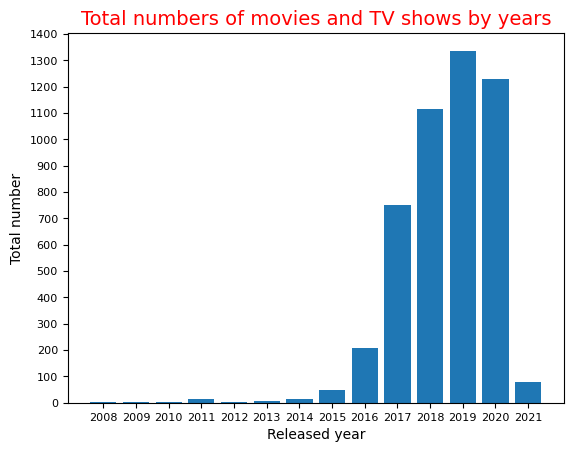

In [31]:
years = nf.groupby("Release_Year")["Show_Id"].count()
labels = years.index.tolist()
values = years.values.tolist()

bars = plt.bar(labels, values)

plt.title("Total numbers of movies and TV shows by years", loc = "center", fontdict = {'fontsize': 14, 'color': 'red'})
plt.xticks([x for x in range(2008, 2022)], fontsize = 8)
plt.yticks([y for y in range(0, 1500, 100)], fontsize = 8)
plt.xlabel("Released year")
plt.ylabel("Total number")

plt.show()

### 2. Numbers of movies vs numbers of TV shows by years

Release_Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      14
2015      47
2016     200
2017     727
2018    1098
2019    1309
2020    1177
2021      75
Name: count, dtype: int64
Release_Year
2013     1
2015     3
2016     7
2017    25
2018    17
2019    28
2020    52
2021     3
Name: count, dtype: int64


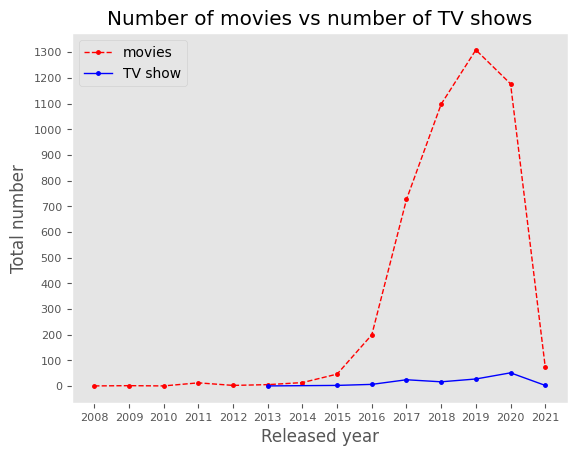

In [49]:
movies = nf[nf["Category"] == 'Movie']["Release_Year"].value_counts()
TV_shows = nf[nf["Category"] == 'TV Show']["Release_Year"].value_counts()

movies = movies.sort_index()
TV_shows = TV_shows.sort_index()

print(movies)
print(TV_shows)

years_of_movie = movies.index.tolist()
years_of_show = TV_shows.index.tolist()
num_movie = movies.values.tolist()
num_show = TV_shows.values.tolist()

plt.title("Number of movies vs number of TV shows")
plt.xlabel("Released year")
plt.ylabel("Total number")

plt.plot(years_of_movie,num_movie, label = 'movies', color = 'red', linewidth = 1, linestyle = '--', marker = '.', markersize = 5, markeredgecolor = 'red')
plt.plot(years_of_show,num_show, label = 'TV show', color = 'blue', linewidth = 1, linestyle = '-', marker = '.', markersize = 5, markeredgecolor = 'blue')

plt.xticks(years, fontsize = 8)
plt.yticks(numbers, fontsize = 8)

plt.grid(False)
plt.legend()

plt.show()

### Top 5 countries have highest numbers of movies and TV shows  

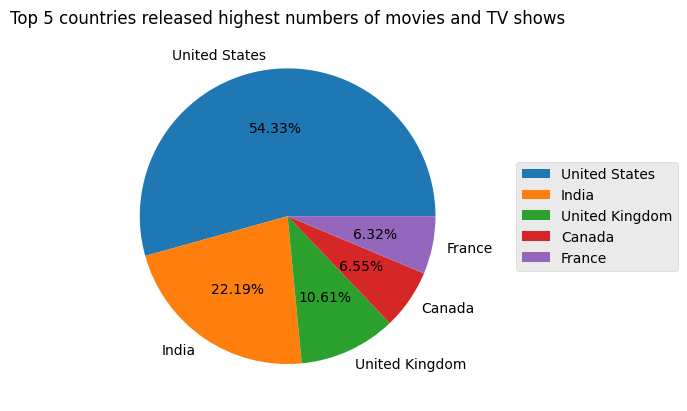

In [33]:
countries = []
for country_list in nf["Country"]:
    if isinstance(country_list, str): 
        country_list = country_list.split(',')  
        countries.extend([country.strip() for country in country_list]) 
number_by_country = {}
for country in countries:
    if country in number_by_country:
        number_by_country[country] += 1
    else:
        number_by_country[country] = 1
number_by_country
data = list(number_by_country.items())
tmp = pd.DataFrame(data, columns = ["Country","Number"])
tmp = tmp.sort_values("Number", ascending = False).head(5)

labels = tmp["Country"]
values = tmp["Number"]
plt.title("Top 5 countries released highest numbers of movies and TV shows")
plt.style.use("ggplot")
pie = plt.pie(values, labels = labels, autopct = '%.2f%%')

plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
plt.show()